In [191]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
# Importing the dataset
df = pd.read_csv("./Data/polovnjaciOcisceni2021.csv")

In [192]:
df_names = df.columns

In [193]:
df_names

Index(['Marka', 'Model', 'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo',
       'Kubikaza', 'Snaga motora', 'Cena', 'EKM', 'Pogon', 'Menjac',
       'Broj vrata', 'Broj sedista', 'Klima', 'Boja', 'Materijal enterijera',
       'Boja enterijera'],
      dtype='object')

### Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Opel'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Peugeot'),
  Text(5, 0, 'Renault'),
  Text(6, 0, 'Fiat'),
  Text(7, 0, 'Citroen'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Mercedes Benz'),
  Text(10, 0, 'Skoda'),
  Text(11, 0, 'Alfa Romeo'),
  Text(12, 0, 'Seat'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Toyota'),
  Text(15, 0, 'Mazda'),
  Text(16, 0, 'Hyundai'),
  Text(17, 0, 'MINI'),
  Text(18, 0, 'Lancia'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'Chevrolet'),
  Text(22, 0, 'Honda'),
  Text(23, 0, 'Suzuki'),
  Text(24, 0, 'Land Rover'),
  Text(25, 0, 'Dacia'),
  Text(26, 0, 'Mitsubishi')])

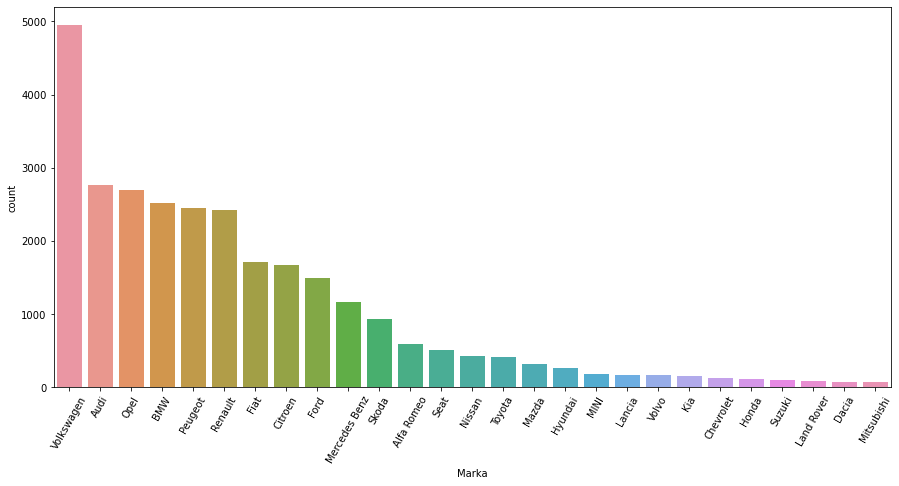

In [194]:
plt.figure(figsize=(15,7))
sns.countplot(df['Marka'], order=df['Marka'].value_counts().index)
plt.xticks(rotation=60)

<AxesSubplot:xlabel='Godiste', ylabel='Density'>

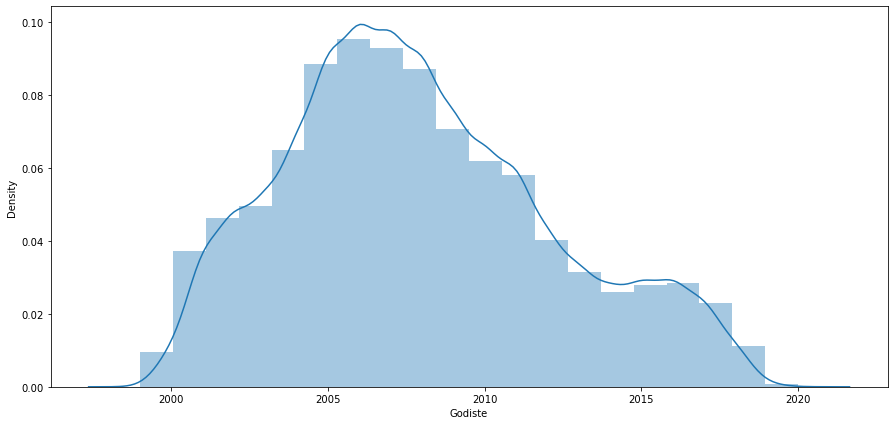

In [195]:
plt.figure(figsize=(15,7))
sns.distplot(df['Godiste'], bins=20)


<AxesSubplot:xlabel='Kilometraza', ylabel='Density'>

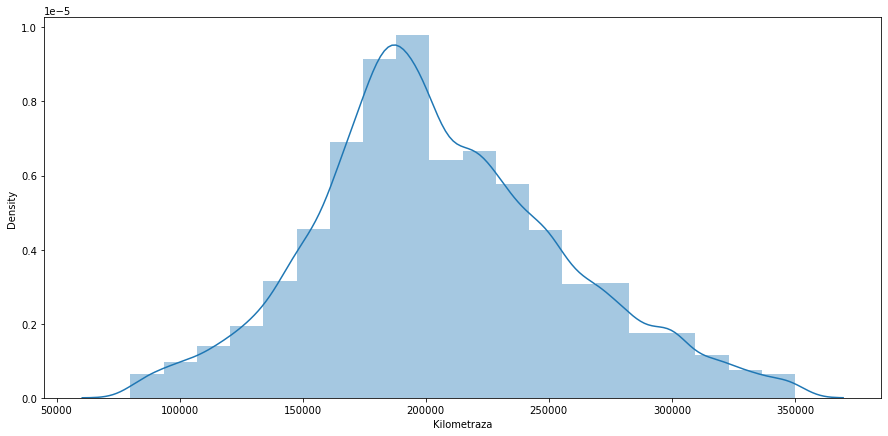

In [196]:
plt.figure(figsize=(15,7))
sns.distplot(df['Kilometraza'], bins=20)


In [197]:
df.drop(df[df['Karoserija']=='Kupe'].index, inplace=True)

<AxesSubplot:xlabel='Karoserija', ylabel='count'>

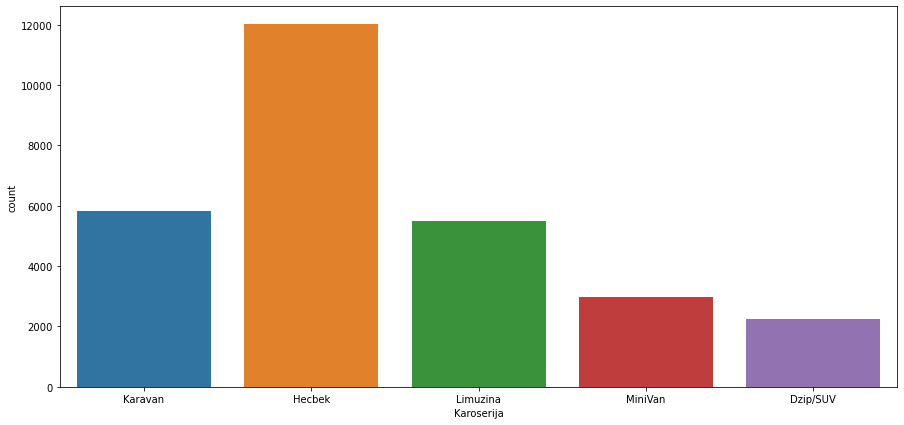

In [198]:
plt.figure(figsize=(15,7))
sns.countplot(df['Karoserija'])

<AxesSubplot:xlabel='Gorivo', ylabel='count'>

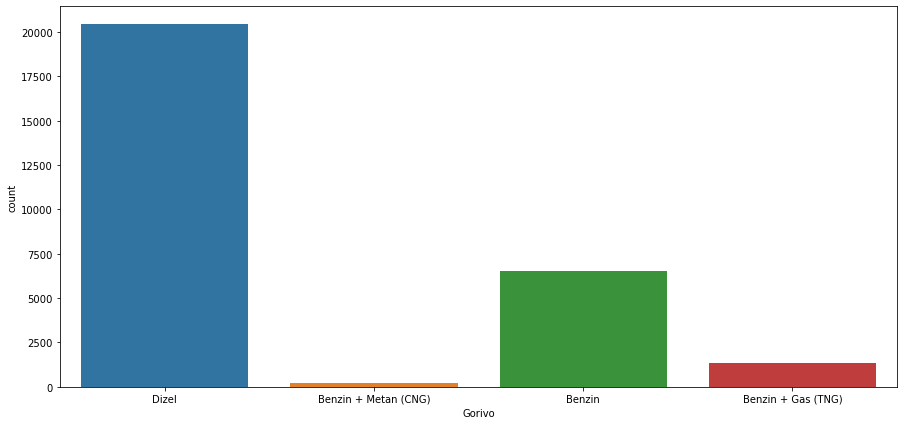

In [199]:
plt.figure(figsize=(15,7))
sns.countplot(df['Gorivo'])

In [200]:
df['Gorivo'].unique()

array(['Dizel', 'Benzin + Metan (CNG)', 'Benzin', 'Benzin + Gas (TNG)'],
      dtype=object)

In [201]:
df.drop(df[df['Gorivo']=='Benzin + Metan (CNG)'].index, inplace=True)

In [202]:
df['Kubikaza'].value_counts()

2.0    8759
1.6    5257
1.9    3459
1.4    2929
1.2    2213
1.5    1573
1.7     790
1.8     729
1.1     443
1.3     396
1.0     390
3.0     348
2.2     332
2.1     309
2.5     227
0.9      65
2.7      63
2.4      61
Name: Kubikaza, dtype: int64

<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

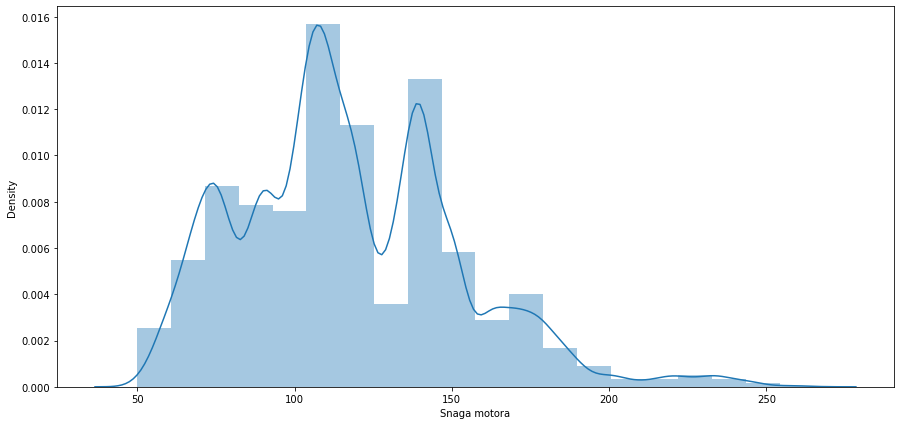

In [203]:
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


In [204]:
df = df.groupby('Snaga motora').filter(lambda x: len(x)>30)


<AxesSubplot:xlabel='Snaga motora', ylabel='Density'>

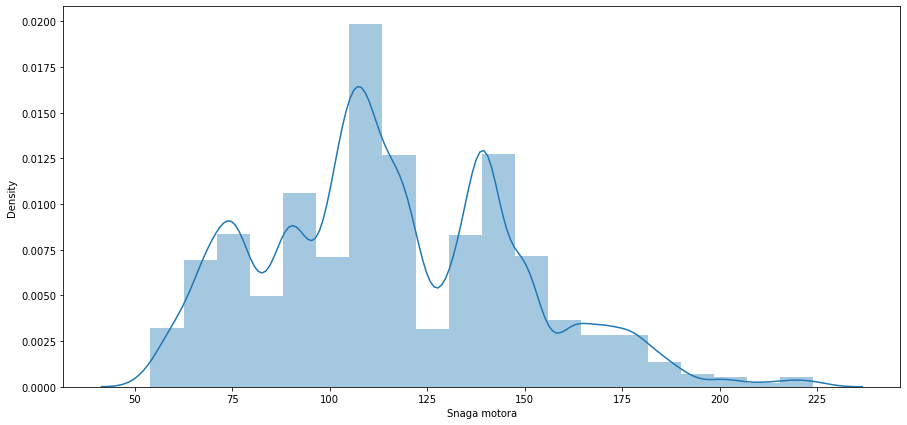

In [205]:
df.drop(df[df['Snaga motora']>=225].index, inplace=True)
plt.figure(figsize=(15,7))
sns.distplot(df['Snaga motora'], bins=20)


<AxesSubplot:xlabel='EKM', ylabel='count'>

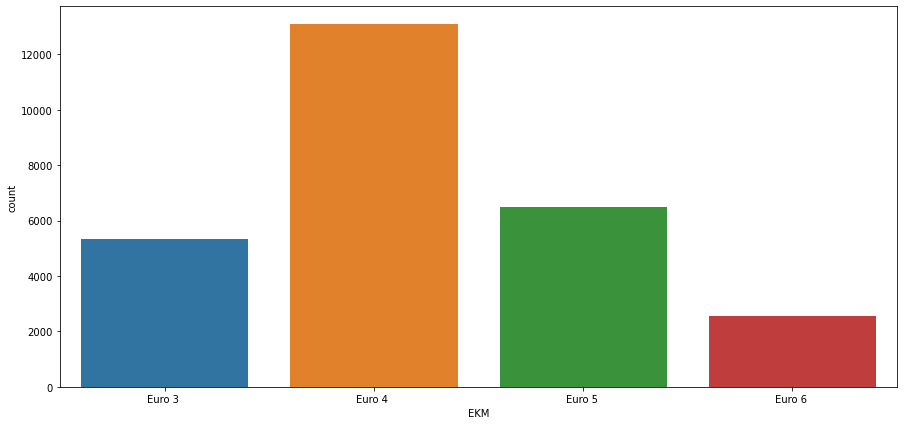

In [206]:
plt.figure(figsize=(15,7))
sns.countplot(df['EKM'])

<AxesSubplot:xlabel='Pogon', ylabel='count'>

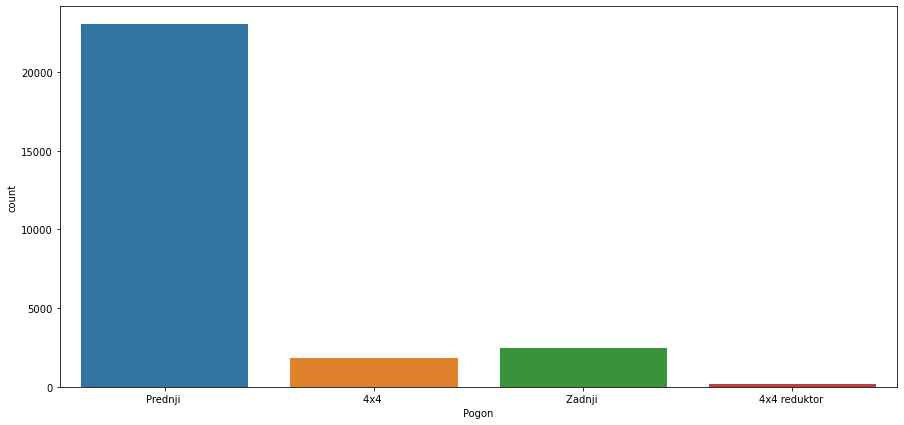

In [207]:
plt.figure(figsize=(15,7))
sns.countplot(df['Pogon'])

In [208]:
df['Pogon'].unique()

array(['Prednji ', '4x4 ', 'Zadnji ', '4x4 reduktor '], dtype=object)

In [209]:
df[df['Pogon']=='4x4 reduktor ']

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Broj vrata,Broj sedista,Klima,Boja,Materijal enterijera,Boja enterijera
146,Mitsubishi,Outlander,2007,191935,Dzip/SUV,Dizel,2.0,140,6499,Euro 4,4x4 reduktor,Manuelni 6 brzina,4/5 vrata,5,Automatska klima,Crna,Stof,Crna
147,Mitsubishi,Outlander,2008,253177,Dzip/SUV,Dizel,2.0,140,6700,Euro 4,4x4 reduktor,Manuelni 6 brzina,4/5 vrata,7,Automatska klima,Siva,Prirodna koza,Crna
174,Land Rover,Freelander,2003,191216,Dzip/SUV,Dizel,1.9,111,3999,Euro 3,4x4 reduktor,Manuelni 5 brzina,4/5 vrata,5,Manuelna klima,Crna,Kombinovana koza,Bež
483,Suzuki,Grand Vitara,2008,225129,Dzip/SUV,Benzin,2.0,140,6700,Euro 4,4x4 reduktor,Manuelni 5 brzina,4/5 vrata,5,Manuelna klima,Crna,Stof,Crna
529,BMW,X3,2007,228000,Dzip/SUV,Dizel,2.0,163,6990,Euro 4,4x4 reduktor,Manuelni 6 brzina,4/5 vrata,5,Automatska klima,Siva,Stof,Crna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27758,Fiat,Panda,2013,146500,Hecbek,Dizel,1.3,90,7490,Euro 5,4x4 reduktor,Manuelni 6 brzina,4/5 vrata,5,Manuelna klima,Bela,Stof,Smeđa
27853,Volkswagen,Touareg,2006,325594,Dzip/SUV,Dizel,3.0,224,6990,Euro 5,4x4 reduktor,Automatski / poluautomatski,4/5 vrata,5,Automatska klima,Crna,Prirodna koza,Bež
27856,Mitsubishi,Outlander,2008,266588,Dzip/SUV,Dizel,2.0,140,6650,Euro 4,4x4 reduktor,Manuelni 6 brzina,4/5 vrata,7,Manuelna klima,Siva,Velur,Crna
28230,Suzuki,Grand Vitara,2006,203000,Dzip/SUV,Dizel,1.9,129,5700,Euro 4,4x4 reduktor,Manuelni 5 brzina,4/5 vrata,5,Automatska klima,Siva,Prirodna koza,Crna


In [210]:
df['Model'].value_counts()

A4          1129
Golf 5       746
320          745
A3           658
Polo         648
            ... 
530           16
607           15
Multipla      14
X5            13
A8             7
Name: Model, Length: 184, dtype: int64

([<matplotlib.axis.XTick at 0x1cecc42f550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

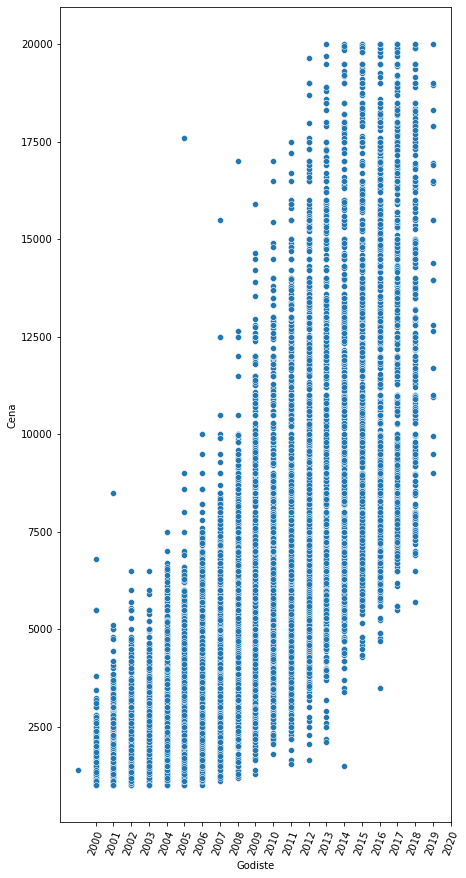

In [211]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'])
plt.xticks(np.arange(2000,2021), rotation=70)

In [212]:
df.drop(df[(df['Godiste']>=2019) | (df['Godiste']<2000)].index, inplace=True)

([<matplotlib.axis.XTick at 0x1ceced01640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

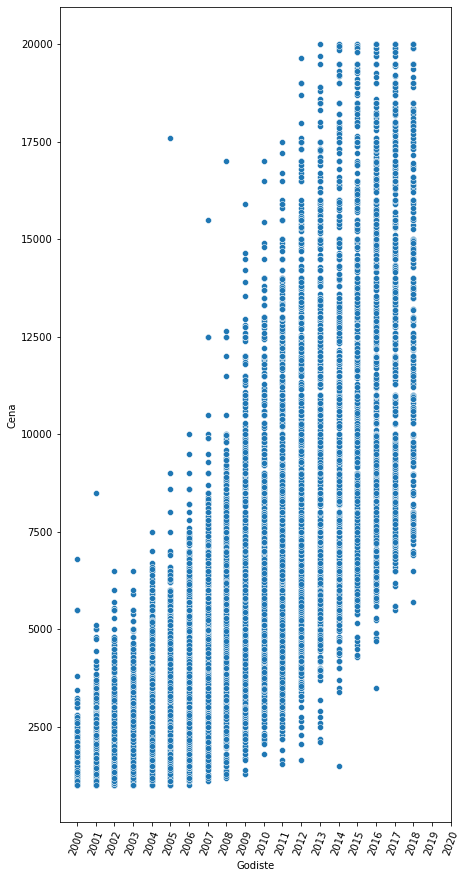

In [213]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'])
plt.xticks(np.arange(2000,2021), rotation=70)

In [214]:
df['Model'].value_counts()

A4          1129
Golf 5       746
320          744
A3           658
Polo         648
            ... 
530           16
607           15
Multipla      14
X5            13
A8             7
Name: Model, Length: 184, dtype: int64

In [215]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)
        

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 105}
Model Passat B6 

{'Karavan': 457, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 63, 'Limuzina': 21}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 39, 'Limuzina': 17}
Model Polo 

{'Hecbek': 598, 'Limuzina': 49, 'Karavan': 1}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 235, 'Karavan': 72, 'Limuzina': 37}
Model Sharan 

{'MiniVan': 106, 'Karavan': 2, 'Limuzina': 1}
Model Golf 5 

{'Hecbek': 645, 'Limuzina': 60, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 286, 'Limuzina': 14, 'Hecbek': 10, 'Karavan': 4, 'Dzip/SUV': 1}
Model Caddy 

{'MiniVan': 63, 'Limuzina': 2, 'Karavan': 1}
Model Passat CC 

{'Limuzina': 33, 'Hecbek': 3}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 62, 'Limuzina': 1, 'Karavan': 1}
Model Golf Plus 

{'MiniVan': 66

Model Sportage 

{'Dzip/SUV': 86}
Model cee`d 

{'Hecbek': 24, 'Karavan': 3, 'Limuzina': 2}
Model Sorento 

{'Dzip/SUV': 33, 'Hecbek': 1}
******************************
Chevrolet
Model Captiva 

{'Dzip/SUV': 52}
Model Cruze 

{'Limuzina': 32, 'Hecbek': 12, 'Karavan': 1}
Model Aveo 

{'Hecbek': 13, 'Limuzina': 13}
******************************
Suzuki
Model Grand Vitara 

{'Dzip/SUV': 48, 'Hecbek': 1}
Model Swift 

{'Hecbek': 33, 'Limuzina': 4}
******************************
Honda
Model Civic 

{'Hecbek': 49, 'Limuzina': 15, 'Karavan': 4}
Model Accord 

{'Limuzina': 34}
******************************
Dacia
Model Logan 

{'Limuzina': 22, 'Karavan': 12, 'MiniVan': 6, 'Hecbek': 2}
Model Sandero 

{'Hecbek': 28, 'Limuzina': 2}


In [216]:
df.drop(df[df['Model']=='Vectra B'].index, inplace=True)
df.drop(df[df['Model']=='Freelander'].index, inplace=True)

In [217]:
#df[df['Model']=='Countryman']

In [218]:
# Volkswagen
df.loc[df[(df['Model']=='Golf 6') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 7') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Polo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Golf 4') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Golf 5') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sharan')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Touran')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Caddy')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Passat CC')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Touareg')].index, 'Karoserija'] = 'Dzip/SUV'
# Audi
df.loc[df[(df['Model']=='A3') & (df['Karoserija']=='Karavan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A4') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Q3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='A1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A2')].index, 'Karoserija'] = 'MiniVan'
# Fiat
df.loc[df[(df['Model']=='Evo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Bravo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Punto')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='500L')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Stilo') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Panda')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Doblo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Idea')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Multipla')].index, 'Karoserija'] = 'MiniVan'
# Ford
df.loc[df[(df['Model']=='C-Max')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Focus') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Fusion')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Galaxy')].index, 'Karoserija'] = 'MiniVan'
# Skoda
df.loc[df[(df['Model']=='Fabia') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Superb') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Rapid')].index, 'Karoserija'] = 'Hecbek'
# Renault
df.loc[df[(df['Model']=='Espace')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Grand Scenic')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Clio') & (df['Karoserija']=='MiniVan')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Twingo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Captur')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Kangoo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Ibiza') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='Leon') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Altea')].index, 'Karoserija'] = 'MiniVan'
# Citroen
df.loc[df[(df['Model']=='C3')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C5') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Karavan'
df.loc[df[(df['Model']=='C3 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C4')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Grand Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C1')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='C4 Picasso')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Berlingo')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Xsara Picasso')].index, 'Karoserija'] = 'MiniVan'
# Opel
df.loc[df[(df['Model']=='Agila')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Meriva')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Zafira')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='Astra J') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa D')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa E')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Corsa C')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Vectra C') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Antara')].index, 'Karoserija'] = 'Dzip/SUV'
# Peugeot
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='308') & (df['Karoserija']=='Dzip/SUV')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='207') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='208')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='107')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='407') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='307')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='3008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='2008')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='206') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='5008') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'MiniVan'
# BMW 
df.loc[df[(df['Model']=='320') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='118')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='116')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='120')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='X3')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X1')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='X5')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='318') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='316') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Mini
df.loc[df[(df['Model']=='Cooper')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Countryman')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='One')].index, 'Karoserija'] = 'Hecbek'
# Mercedes Benz
df.loc[df[(df['Model']=='B 180')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='B 200')].index, 'Karoserija'] = 'MiniVan'
df.loc[df[(df['Model']=='C 200') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 220') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='C 180') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='A 160')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 180')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 170')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='A 150')].index, 'Karoserija'] = 'Hecbek'
# Hyundai
df.loc[df[(df['Model']=='i20')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Getz')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='i30') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
# Nissan
df.loc[df[(df['Model']=='Qashqai')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Juke')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Micra')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Note')].index, 'Karoserija'] = 'Hecbek'
# Alfa Romeo
df.loc[df[(df['Model']=='Giulietta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='147')].index, 'Karoserija'] = 'Hecbek'
# Toyota
df.loc[df[(df['Model']=='Aygo')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Auris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Yaris')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Avensis') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
# Lancia
df.loc[df[(df['Model']=='Ypsilon')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Delta')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Musa')].index, 'Karoserija'] = 'MiniVan'
# Land Rover
df.loc[df[(df['Model']=='Freelander')].index, 'Karoserija'] = 'Dzip/SUV'
# Mazda
df.loc[df[(df['Model']=='2')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='6') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='5')].index, 'Karoserija'] = 'MiniVan'
# Mitsubishi
df.loc[df[(df['Model']=='Colt')].index, 'Karoserija'] = 'Hecbek'
# Kia
df.loc[df[(df['Model']=='cee`d') & (df['Karoserija']=='Limuzina')].index, 'Karoserija'] = 'Hecbek'
df.loc[df[(df['Model']=='Sorento')].index, 'Karoserija'] = 'Dzip/SUV'
# Suzuki
df.loc[df[(df['Model']=='Grand Vitara')].index, 'Karoserija'] = 'Dzip/SUV'
df.loc[df[(df['Model']=='Swift')].index, 'Karoserija'] = 'Hecbek'
# Dacia
df.loc[df[(df['Model']=='Logan') & (df['Karoserija']=='Hecbek')].index, 'Karoserija'] = 'Limuzina'
df.loc[df[(df['Model']=='Sandero')].index, 'Karoserija'] = 'Hecbek'

In [219]:
for brand in df['Marka'].unique():
    print('*'*30)
    print(brand)
    for model in df[df['Marka']==brand]['Model'].unique():
        print('Model {} \n'.format(model))
        no_types = (df[(df['Model']==model)]['Karoserija'].value_counts().tolist())
        types = (df[(df['Model']==model)]['Karoserija'].value_counts().index.tolist())
        dict_t = dict(zip(types, no_types))
        print(dict_t)

******************************
Volkswagen
Model Passat B5.5 

{'Karavan': 196, 'Limuzina': 105}
Model Passat B6 

{'Karavan': 457, 'Limuzina': 171}
Model Golf 6 

{'Hecbek': 363, 'Karavan': 84}
Model Golf 7 

{'Hecbek': 258, 'Karavan': 56}
Model Polo 

{'Hecbek': 598, 'Karavan': 50}
Model Tiguan 

{'Dzip/SUV': 176, 'Hecbek': 1}
Model Golf 4 

{'Hecbek': 272, 'Karavan': 72}
Model Sharan 

{'MiniVan': 109}
Model Golf 5 

{'Hecbek': 705, 'Karavan': 41}
Model Passat B8 

{'Limuzina': 88, 'Karavan': 84}
Model Passat B7 

{'Karavan': 118, 'Limuzina': 66}
Model Touran 

{'MiniVan': 315}
Model Caddy 

{'MiniVan': 66}
Model Passat CC 

{'Limuzina': 36}
Model Bora 

{'Limuzina': 39, 'Karavan': 22}
Model Touareg 

{'Dzip/SUV': 64}
Model Golf Plus 

{'MiniVan': 66, 'Hecbek': 32, 'Limuzina': 7}
Model Jetta 

{'Limuzina': 35}
Model Passat B5 

{'Karavan': 22, 'Limuzina': 6}
Model Fox 

{'Hecbek': 29, 'Limuzina': 3}
******************************
Audi
Model A3 

{'Hecbek': 598, 'Limuzina': 60}
Model 

<AxesSubplot:xlabel='Menjac', ylabel='count'>

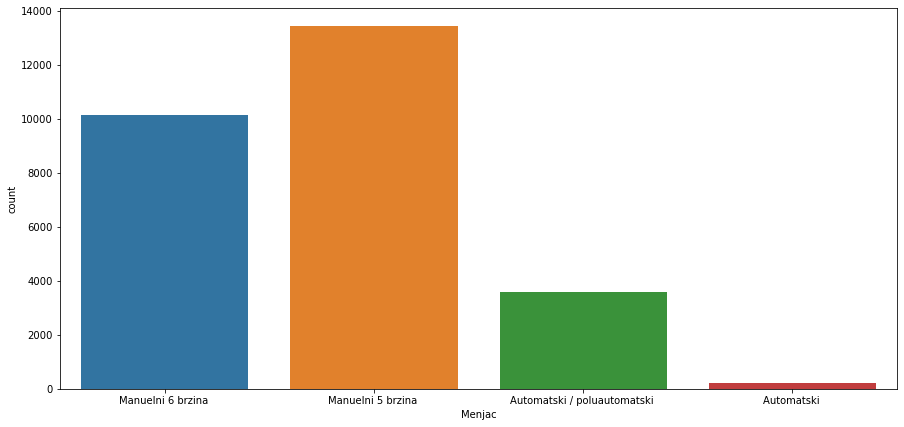

In [220]:
plt.figure(figsize=(15,7))
sns.countplot(df['Menjac'])

In [221]:
for i in range(6):
    for year in range(2000,2021):
        max = df[df['Godiste']==year]['Cena'].max()
        min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

In [222]:
for i in range(4):
    for year in range(2007,2015):
        max = df[df['Godiste']==year]['Cena'].max()
        #min = df[df['Godiste']==year]['Cena'].min()
        df.drop(df[(df['Godiste']==year) & (df['Cena']==max)].index, inplace=True)
        #df.drop(df[(df['Godiste']==year) & (df['Cena']==min)].index, inplace=True)

([<matplotlib.axis.XTick at 0x1ced7e847c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

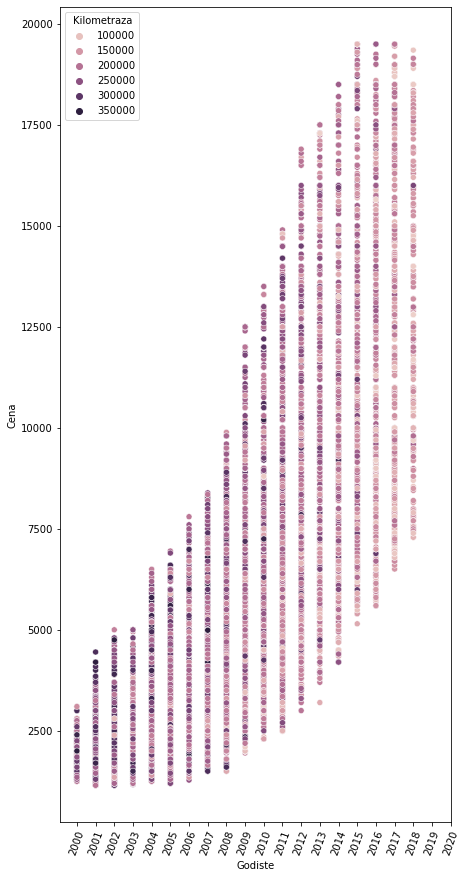

In [223]:
plt.figure(figsize=(7,15))
sns.scatterplot(df['Godiste'], df['Cena'], data=df, hue='Kilometraza')
plt.xticks(np.arange(2000,2021), rotation=70)

In [224]:
df = df.groupby('Model').filter(lambda x: len(x)>=15)

<AxesSubplot:xlabel='Kilometraza'>

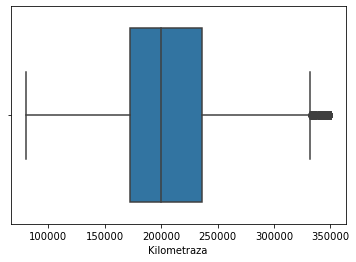

In [225]:
sns.boxplot(df['Kilometraza'])

In [226]:
df.drop(df[(df['Kilometraza']>=320000)].index, inplace=True)

<AxesSubplot:xlabel='Kilometraza'>

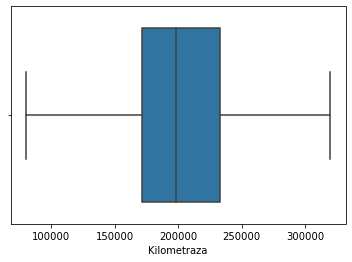

In [227]:
sns.boxplot(df['Kilometraza'])

<AxesSubplot:xlabel='Cena'>

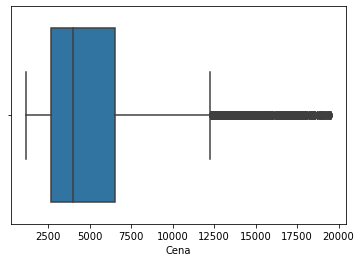

In [228]:
sns.boxplot(df['Cena'])

In [229]:
#df.drop(df[(df['Cena']>=12000)].index, inplace=True)

<AxesSubplot:xlabel='Cena'>

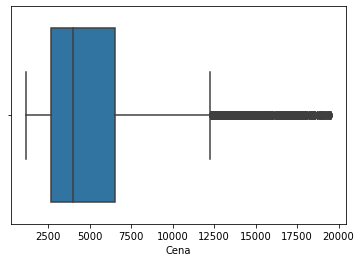

In [230]:
sns.boxplot(df['Cena'])

In [231]:
df = df.groupby('Model').filter(lambda x: len(x)>=15)

In [232]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Broj vrata,Broj sedista,Klima,Boja,Materijal enterijera,Boja enterijera
0,Volkswagen,Passat B5.5,2003,217000,Karavan,Dizel,1.9,131,1850,Euro 3,Prednji,Manuelni 6 brzina,4/5 vrata,5,Automatska klima,Srebrna,Stof,Crna
2,Volkswagen,Passat B6,2008,244000,Limuzina,Dizel,1.9,105,5499,Euro 4,Prednji,Manuelni 5 brzina,4/5 vrata,5,Manuelna klima,Plava,Stof,Crna
3,Audi,A3,2013,164000,Hecbek,Dizel,2.0,150,11200,Euro 5,Prednji,Manuelni 6 brzina,2/3 vrata,5,Automatska klima,Bela,Stof,Siva
4,Fiat,Grande Punto,2012,95987,Hecbek,Benzin,1.4,77,4699,Euro 5,Prednji,Manuelni 5 brzina,4/5 vrata,5,Manuelna klima,Bela,Stof,Crna
5,Volkswagen,Golf 6,2009,219000,Hecbek,Dizel,2.0,110,6950,Euro 5,Prednji,Manuelni 5 brzina,4/5 vrata,5,Automatska klima,Crna,Stof,Crna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,Seat,Leon,2010,223891,Hecbek,Benzin,1.4,124,4700,Euro 5,Prednji,Manuelni 6 brzina,4/5 vrata,5,Manuelna klima,Siva,Druga,Crna
28540,Ford,Focus,2006,270500,Hecbek,Benzin,1.8,125,2999,Euro 4,Prednji,Manuelni 5 brzina,4/5 vrata,5,Automatska klima,Siva,Velur,Siva
28541,Audi,A4,2008,215400,Limuzina,Dizel,2.0,140,7900,Euro 5,Prednji,Automatski / poluautomatski,4/5 vrata,5,Automatska klima,Crna,Kombinovana koza,Crna
28542,Mercedes Benz,A 170,2002,230000,Hecbek,Dizel,1.7,95,1500,Euro 3,Prednji,Manuelni 5 brzina,4/5 vrata,5,Manuelna klima,Bordo,Stof,Siva


<AxesSubplot:>

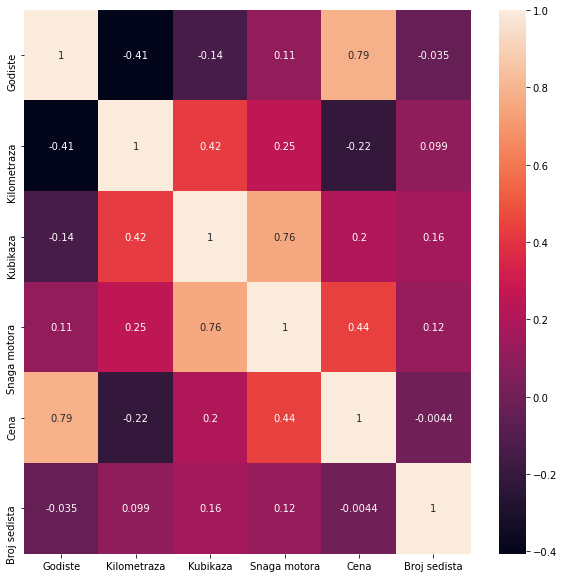

In [233]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

### Engine power

In [234]:
for model in df['Model'].unique():
    print('-'*30)
    print('Model: {}'.format(model))
    power = sorted(list(df[df['Model']==model]['Snaga motora'].unique()))
    print(power)
    base=5
    new_power = sorted(set([base * round(a_number/base) for a_number in power]))
    print('Converted')
    print(new_power)
        

------------------------------
Model: Passat B5.5
[101, 102, 105, 116, 129, 131, 136, 150, 163, 179]
Converted
[100, 105, 115, 130, 135, 150, 165, 180]
------------------------------
Model: Passat B6
[101, 105, 109, 110, 116, 121, 122, 136, 139, 140, 141, 143, 150, 160, 170, 200]
Converted
[100, 105, 110, 115, 120, 135, 140, 145, 150, 160, 170, 200]
------------------------------
Model: A3
[75, 90, 101, 102, 105, 109, 110, 116, 122, 124, 125, 131, 136, 139, 140, 141, 150, 160, 170, 179, 184, 200]
Converted
[75, 90, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 160, 170, 180, 185, 200]
------------------------------
Model: Grande Punto
[64, 65, 68, 69, 75, 77, 80, 84, 86, 90, 94, 95, 105, 120, 129, 131, 135, 155]
Converted
[65, 70, 75, 80, 85, 90, 95, 105, 120, 130, 135, 155]
------------------------------
Model: Golf 6
[79, 80, 86, 90, 102, 105, 109, 110, 120, 121, 122, 129, 136, 139, 140, 160, 163, 170, 204, 211]
Converted
[80, 85, 90, 100, 105, 110, 120, 130, 135, 140, 160, 165, 

[84, 105, 106, 114, 116, 117, 118, 122, 136]
Converted
[85, 105, 115, 120, 135]
------------------------------
Model: Q5
[140, 143, 150, 170, 177, 179, 190, 211]
Converted
[140, 145, 150, 170, 175, 180, 190, 210]
------------------------------
Model: C 200
[90, 116, 117, 122, 129, 135, 136, 143, 162, 163, 184]
Converted
[90, 115, 120, 130, 135, 145, 160, 165, 185]
------------------------------
Model: Fusion
[68, 75, 77, 79, 80, 90, 101]
Converted
[70, 75, 80, 90, 100]
------------------------------
Model: 6
[120, 121, 124, 125, 129, 136, 139, 140, 141, 143, 150, 155, 162, 163, 165, 170, 174]
Converted
[120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]
------------------------------
Model: A 160
[75, 82, 84, 90, 95, 98, 101, 102, 105, 109]
Converted
[75, 80, 85, 90, 95, 100, 105, 110]
------------------------------
Model: Astra K
[95, 101, 105, 110, 136, 150, 160]
Converted
[95, 100, 105, 110, 135, 150, 160]
------------------------------
Model: Avensis
[110, 111, 113, 114, 1

In [235]:
base = 5
df['Snaga motora'] = df['Snaga motora'].apply(lambda x: int(base * round(x/base)))

In [236]:
vc = df['Model'].value_counts()
print(vc[vc > 30])

A4        1088
Golf 5     733
320        709
A3         645
Polo       636
          ... 
S-Max       32
Fox         32
Colt        32
2008        31
Accord      31
Name: Model, Length: 164, dtype: int64


In [237]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(sorted(df[df['Kubikaza']==kubikaza]['Snaga motora'].unique()))

0.9
------------------------------
[70, 80, 85, 90, 95, 100, 105]
1.0
------------------------------
[60, 65, 70, 75, 90, 95, 100, 105, 110, 115, 125, 170]
1.1
------------------------------
[55, 60, 65, 75, 80, 100, 105]
1.2
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 140, 150]
1.3
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
1.4
------------------------------
[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 180, 205]
1.5
------------------------------
[60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 135, 140, 150]
1.6
------------------------------
[60, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 155, 160, 165, 170, 175, 180, 185, 190, 200, 210, 220]
1.7
------------------------------
[55, 65, 70, 75, 80, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 150, 200]
1.8
------------------------------


In [238]:
df.count()[0]

26055

In [239]:
df_new = pd.DataFrame()
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Kubikaza']==kubikaza].groupby("Snaga motora").filter(lambda x: len(x) >= 4))

0.9
------------------------------
90     33
85     21
80      2
105     2
70      1
95      1
100     1
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      25
125     16
100     12
115      7
95       3
110      3
75       2
105      2
90       1
170      1
Name: Snaga motora, dtype: int64
1.1
------------------------------
75     144
60     139
100     40
55      38
65       7
105      3
80       2
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     515
70     337
60     297
80     230
85     182
65     159
95     111
90      86
55      84
105     66
100     19
115     12
130      7
110      6
120      2
150      1
140      1
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     64
90     59
70     57
95     44
100    25
80     10
60      7
105     2
65      1
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     712
70     526
90     413
95     239
80     212
120 

In [240]:
df = df_new

In [241]:
for kubikaza in sorted(df['Kubikaza'].unique()):
    print(kubikaza)
    print('-'*30)
    print(df[df['Kubikaza']==kubikaza]['Snaga motora'].value_counts())

0.9
------------------------------
90    33
85    21
Name: Snaga motora, dtype: int64
1.0
------------------------------
70     222
60      73
65      25
125     16
100     12
115      7
Name: Snaga motora, dtype: int64
1.1
------------------------------
75     144
60     139
100     40
55      38
65       7
Name: Snaga motora, dtype: int64
1.2
------------------------------
75     515
70     337
60     297
80     230
85     182
65     159
95     111
90      86
55      84
105     66
100     19
115     12
130      7
110      6
Name: Snaga motora, dtype: int64
1.3
------------------------------
75     88
85     64
90     59
70     57
95     44
100    25
80     10
60      7
Name: Snaga motora, dtype: int64
1.4
------------------------------
75     712
70     526
90     413
95     239
80     212
120    177
100    149
140     81
150     52
85      49
125     44
60      30
170     22
160     20
130     17
105     16
155     15
135     14
110     13
55       6
180      4
Name: Snaga motora, d

In [242]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    print(df[df['Model']==model]['Snaga motora'].value_counts())
    df_new = df_new.append(df[df['Model']==model].groupby("Snaga motora").filter(lambda x: len(x) >= 3))
df = df_new

107
------------------------------
70    35
55     1
Name: Snaga motora, dtype: int64
116
------------------------------
115    86
120    22
135    17
90      1
Name: Snaga motora, dtype: int64
118
------------------------------
145    69
120    65
150     9
135     6
130     2
115     1
140     1
190     1
Name: Snaga motora, dtype: int64
120
------------------------------
165    50
175    15
160     8
150     4
185     4
190     4
145     1
170     1
200     1
Name: Snaga motora, dtype: int64
147
------------------------------
120    51
115    48
105    30
150    28
140     6
110     3
170     2
100     1
190     1
Name: Snaga motora, dtype: int64
156
------------------------------
115    25
140    19
150     9
110     8
120     3
155     1
Name: Snaga motora, dtype: int64
159
------------------------------
150    112
120     29
170      5
140      4
115      2
135      2
165      1
Name: Snaga motora, dtype: int64
2
------------------------------
75     19
70     16
85      8
80    

Bravo
------------------------------
120    79
150    27
90     26
105    23
115     7
165     4
100     2
Name: Snaga motora, dtype: int64
C 180
------------------------------
145    17
130    13
155    12
115     7
120     5
150     1
Name: Snaga motora, dtype: int64
C 200
------------------------------
135    46
120    23
165    22
115    11
145     4
160     2
185     2
130     1
Name: Snaga motora, dtype: int64
C 220
------------------------------
170    66
145    21
150    10
135     4
115     2
140     1
205     1
125     1
Name: Snaga motora, dtype: int64
C-Max
------------------------------
110    39
115    37
135    22
90     20
125    15
100    14
95      6
120     5
105     2
140     2
75      1
130     1
150     1
Name: Snaga motora, dtype: int64
C1
------------------------------
70    68
55     4
75     1
Name: Snaga motora, dtype: int64
C2
------------------------------
60     18
70     16
75      8
120     4
110     1
Name: Snaga motora, dtype: int64
C3
----------------

Ka
------------------------------
70    21
75     8
60     4
Name: Snaga motora, dtype: int64
Kadjar
------------------------------
110    58
130    16
115     1
Name: Snaga motora, dtype: int64
Kangoo
------------------------------
65     7
70     6
80     6
85     6
90     5
75     4
105    4
95     3
60     1
Name: Snaga motora, dtype: int64
Kuga
------------------------------
135    49
140    33
150    15
165    10
120     7
180     4
160     1
Name: Snaga motora, dtype: int64
Laguna
------------------------------
120    51
110    43
150    40
105    21
130    20
100     9
140     5
115     1
135     1
165     1
170     1
180     1
Name: Snaga motora, dtype: int64
Leon
------------------------------
105    49
140    17
110    14
90     12
150    11
125     9
100     7
170     7
75      6
85      4
115     3
210     2
200     2
190     1
70      1
180     1
120     1
Name: Snaga motora, dtype: int64
Logan
------------------------------
75     13
85      7
90      7
65      3
70     

X3
------------------------------
150    96
175    54
185    34
190     7
205     4
165     3
140     1
145     1
Name: Snaga motora, dtype: int64
XC60
------------------------------
165    11
135     5
150     3
190     1
Name: Snaga motora, dtype: int64
Xsara Picasso
------------------------------
90     40
110    29
95     15
115    13
135     2
120     1
Name: Snaga motora, dtype: int64
Yaris
------------------------------
70     49
85     25
90     24
65      7
75      5
100     5
105     1
Name: Snaga motora, dtype: int64
Ypsilon
------------------------------
60     23
70     13
85      7
95      7
75      6
80      3
105     1
Name: Snaga motora, dtype: int64
Zafira
------------------------------
100    72
120    46
125    24
150    22
110    20
140     9
135     8
115     4
105     3
130     2
Name: Snaga motora, dtype: int64
cee`d
------------------------------
90     10
115     8
100     6
135     2
110     2
140     1
Name: Snaga motora, dtype: int64
i20
-------------------

In [243]:
df.count()[0]

25405

In [244]:
df_new = pd.DataFrame()
for model in sorted(df['Model'].unique()):
    print(model)
    print('-'*30)
    print(df[df['Model']==model]['Kubikaza'].value_counts())
    df_new = df_new.append(df[df['Model']==model].groupby("Kubikaza").filter(lambda x: len(x) >= 3))
df = df_new

107
------------------------------
1.0    35
Name: Kubikaza, dtype: int64
116
------------------------------
1.6    68
2.0    43
1.5    14
Name: Kubikaza, dtype: int64
118
------------------------------
2.0    146
1.9      3
Name: Kubikaza, dtype: int64
120
------------------------------
2.0    85
Name: Kubikaza, dtype: int64
147
------------------------------
1.9    113
1.6     51
2.0      2
Name: Kubikaza, dtype: int64
156
------------------------------
1.9    51
1.7     4
2.0     3
1.6     2
1.8     2
2.4     2
Name: Kubikaza, dtype: int64
159
------------------------------
1.9    134
2.0     12
1.8      4
Name: Kubikaza, dtype: int64
2
------------------------------
1.4    24
1.3    17
1.2     8
1.7     1
Name: Kubikaza, dtype: int64
2008
------------------------------
1.6    22
1.5     1
Name: Kubikaza, dtype: int64
206
------------------------------
1.4    138
1.6     34
1.1     20
2.0     19
1.9      5
1.8      2
Name: Kubikaza, dtype: int64
207
------------------------------
1.

Croma
------------------------------
1.9    50
2.0     1
Name: Kubikaza, dtype: int64
Cruze
------------------------------
1.6    20
2.0    16
1.8     4
Name: Kubikaza, dtype: int64
DS3
------------------------------
1.6    31
1.4     8
Name: Kubikaza, dtype: int64
Delta
------------------------------
1.6    31
1.4    12
2.0    10
1.9     5
Name: Kubikaza, dtype: int64
Doblo
------------------------------
1.9    13
1.6    10
1.2     9
Name: Kubikaza, dtype: int64
E 200
------------------------------
2.1    59
2.2    15
1.8     5
2.0     1
1.9     1
Name: Kubikaza, dtype: int64
E 220
------------------------------
2.1    58
2.2    24
Name: Kubikaza, dtype: int64
EVO
------------------------------
1.2    95
1.4    28
1.3    23
0.9     1
Name: Kubikaza, dtype: int64
Espace
------------------------------
2.0    26
1.9    18
1.6     7
2.2     3
Name: Kubikaza, dtype: int64
Fabia
------------------------------
1.4    96
1.2    83
1.9    37
1.6    11
1.0     3
1.1     1
Name: Kubikaza, dtype:

Touran
------------------------------
1.9    114
2.0    106
1.6     50
1.4     28
1.2      1
Name: Kubikaza, dtype: int64
Tucson
------------------------------
2.0    58
1.7    12
Name: Kubikaza, dtype: int64
Twingo
------------------------------
1.1    56
1.5    19
1.2    15
1.3     1
Name: Kubikaza, dtype: int64
V40
------------------------------
2.0    42
1.6    15
1.9     3
1.8     2
Name: Kubikaza, dtype: int64
V50
------------------------------
1.6    28
2.0    26
Name: Kubikaza, dtype: int64
Vectra C
------------------------------
1.9    53
1.8    19
2.0    19
2.2     6
1.6     2
Name: Kubikaza, dtype: int64
X-Trail
------------------------------
1.6    18
2.0    11
2.2     4
1.9     1
Name: Kubikaza, dtype: int64
X1
------------------------------
2.0    86
1.5     4
Name: Kubikaza, dtype: int64
X3
------------------------------
2.0    192
3.0      4
1.9      2
Name: Kubikaza, dtype: int64
XC60
------------------------------
2.0    14
2.4     5
Name: Kubikaza, dtype: int64
Xsara

In [245]:
df.count()[0]

25259

In [246]:
df['Model'].value_counts()

A4           1081
Golf 5        728
320           705
A3            641
Polo          627
             ... 
i20            20
XC60           19
Passat B5      15
ML 270         15
607            10
Name: Model, Length: 177, dtype: int64

In [248]:
df.count()[0]

24993

<AxesSubplot:xlabel='Cena', ylabel='Density'>

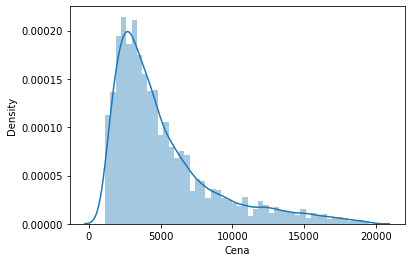

In [249]:
sns.distplot(df['Cena'])

([<matplotlib.axis.YTick at 0x1cede2822e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

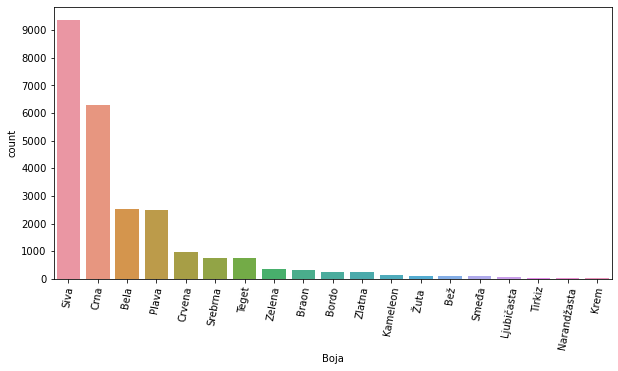

In [254]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja'], order=df['Boja'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,10000, 1000))

In [260]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Srebrna', 'Crvena', 'Žuta ', 'Plava', 'Bela',
       'Teget', 'Braon', 'Bordo', 'Kameleon', 'Zelena', 'Smeđa', 'Bež',
       'Zlatna', 'Narandžasta', 'Krem', 'Tirkiz', 'Ljubičasta'],
      dtype=object)

In [261]:
def change_color(row):
    if row not in ['Siva', 'Crna', 'Bela','Plava', 'Crvena']:
        return 'Druga'
    else:
        return row
df['Boja'] = df['Boja'].apply(change_color)

In [262]:
df['Boja'].unique()

array(['Crna', 'Siva', 'Druga', 'Crvena', 'Plava', 'Bela'], dtype=object)

([<matplotlib.axis.YTick at 0x1cede4c8bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

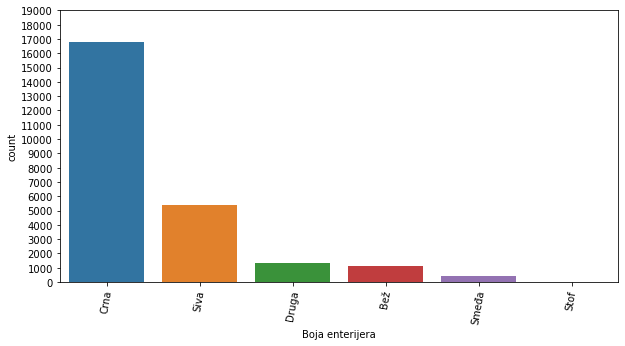

In [257]:
plt.figure(figsize=(10,5))
sns.countplot(df['Boja enterijera'], order=df['Boja enterijera'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,20000, 1000))

In [263]:
def change_color_inside(row):
    if row not in ['Siva', 'Crna', 'Bež']:
        return 'Druga'
    else:
        return row
df['Boja enterijera'] = df['Boja enterijera'].apply(change_color_inside)

([<matplotlib.axis.YTick at 0x1cede5b7fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

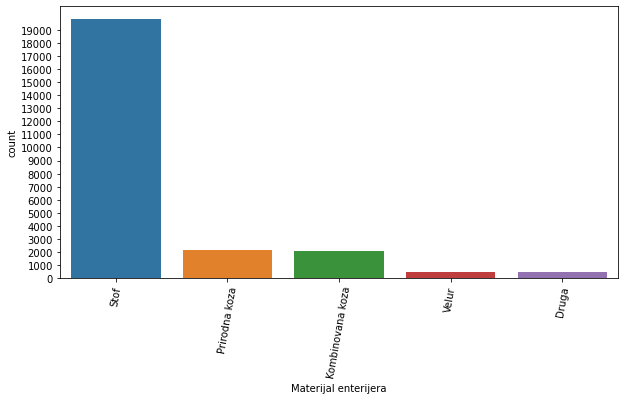

In [258]:
plt.figure(figsize=(10,5))
sns.countplot(df['Materijal enterijera'], order=df['Materijal enterijera'].value_counts().index)
plt.xticks(rotation=80)
plt.yticks(np.arange(0,20000, 1000))

In [270]:
df['Materijal enterijera'].unique()

array(['Stof', 'Kombinovana koza', 'Prirodna koza', 'Drugi'], dtype=object)

In [267]:
def change_material(row):
    if row not in ['Stof', 'Kombinovana koza', 'Prirodna koza']:
        return 'Drugi'
    else:
        return row
df['Materijal enterijera'] = df['Materijal enterijera'].apply(change_material)

In [268]:
df = df.groupby('Model').filter(lambda x: len(x)>=25)

In [272]:
df.drop(columns=['Broj sedista', 'Klima'], inplace=True)

KeyError: "['Broj sedista' 'Klima'] not found in axis"

In [273]:
df.to_csv('./Data/usedCleaned20.csv', index=False)